# Actividad #4. Perfilado de Datos

## Parte 1. Integración y Exploración

In [55]:
import kagglehub

path = kagglehub.dataset_download("carrie1/ecommerce-data")

print("Path to dataset files:", path)

Path to dataset files: /Users/eduardo/.cache/kagglehub/datasets/carrie1/ecommerce-data/versions/1


In [57]:
import pandas as pd

path = path + '/data.csv'

df = pd.read_csv(path, encoding='ISO-8859-1')

display({'shape': df.shape})
display(df.dtypes)
display(df.head())


{'shape': (541909, 8)}

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], dayfirst=False, errors='coerce')
display(df.dtypes)

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [ ]:
num_summary = df[['Quantity', 'UnitPrice']].describe()
display(num_summary)

,Quantity,UnitPrice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


In [ ]:
display(df[(df['Quantity'].isna()) | (df['UnitPrice'].isna())])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [ ]:
cat_cols = ['InvoiceNo', 'StockCode', 'Description', 'Country', 'CustomerID']

print('Valores nulos por columna categórica:')
display(df[cat_cols].isna().sum())

Valores nulos por columna categórica:


InvoiceNo           0
StockCode           0
Description      1454
Country             0
CustomerID     135080
dtype: int64

In [ ]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
display(df[['Quantity', 'UnitPrice', 'TotalPrice']].head())

,Quantity,UnitPrice,TotalPrice
0,6,2.55,15.30
1,6,3.39,20.34
2,8,2.75,22.00
3,6,3.39,20.34
4,6,3.39,20.34


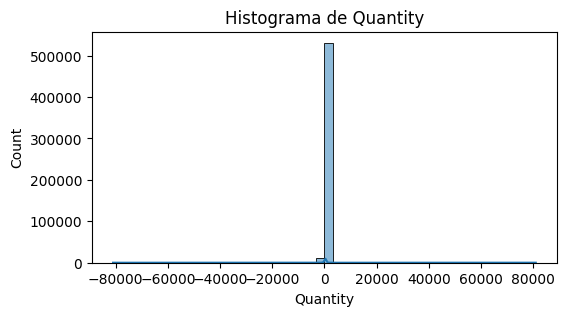

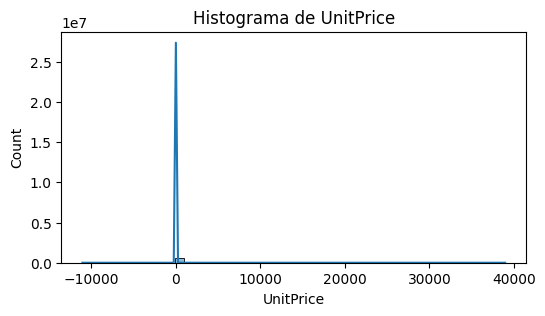

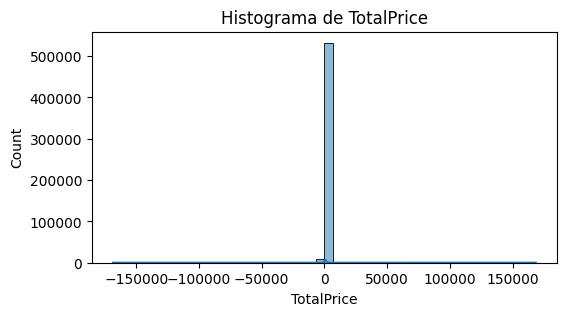

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numericas = ['Quantity', 'UnitPrice', 'TotalPrice']

for col in numericas:
    plt.figure(figsize=(6,3))
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f'Histograma de {col}')
    plt.show()

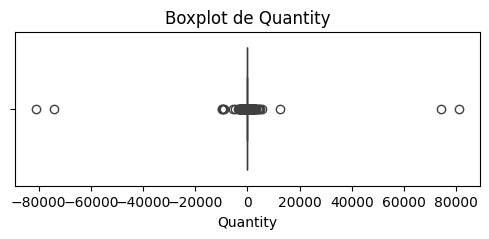

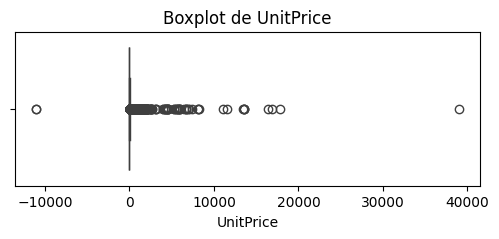

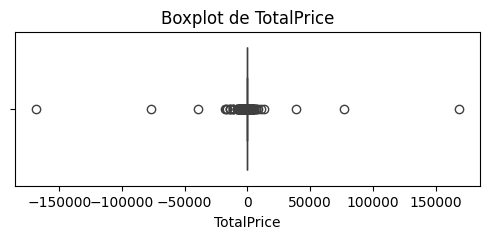

In [ ]:
for col in numericas:
    plt.figure(figsize=(6,2))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
    plt.show()

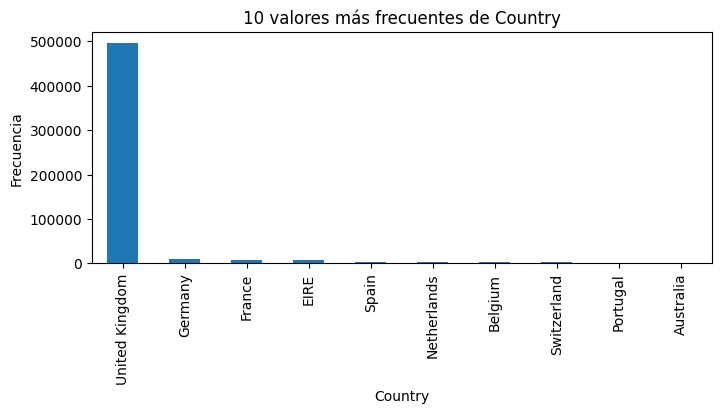

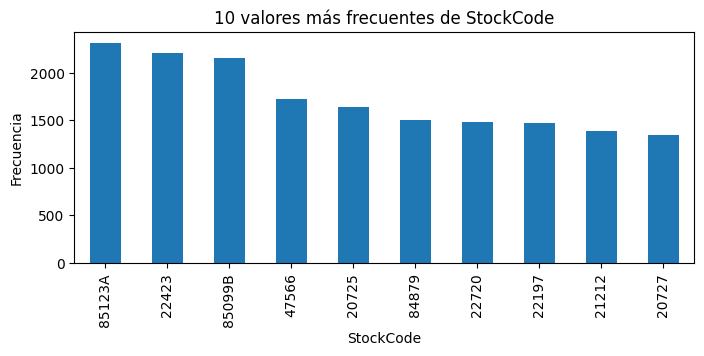

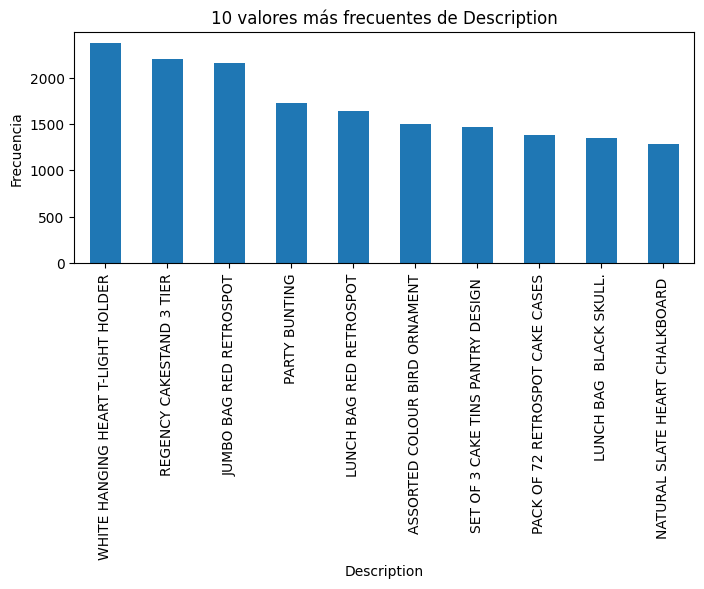

In [ ]:
categoricas = ['Country', 'StockCode', 'Description']

for col in categoricas:
    plt.figure(figsize=(8,3))
    df[col].value_counts().head(10).plot(kind='bar')
    plt.title(f'10 valores más frecuentes de {col}')
    plt.ylabel('Frecuencia')
    plt.xlabel(col)
    plt.show()

## Parte 2. Perfilado de Calidad

In [ ]:
#nulos por columna
nulos = df.isnull().sum().to_frame('nulos')
nulos['% nulos'] = 100 * nulos['nulos'] / len(df)
display(nulos)

,nulos,% nulos
InvoiceNo,0,0.000000
StockCode,0,0.000000
Description,1454,0.268311
Quantity,0,0.000000
InvoiceDate,0,0.000000
UnitPrice,0,0.000000
CustomerID,135080,24.926694
Country,0,0.000000
TotalPrice,0,0.000000


In [ ]:
#filas duplicadas
duplicados = df.duplicated(keep=False)
print(f"Filas duplicadas: {duplicados.sum()}")
if duplicados.sum() > 0:
    display(df[duplicados].head())

Filas duplicadas: 10147


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom,4.95
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom,2.10
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom,1.25
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom,1.25
521,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom,2.95


In [58]:
#valores anomalos en Quantity y UnitPrice usando IQR
def get_iqr_outliers(series):
    q1, q3 = series.quantile([0.25, 0.75])
    iqr = q3 - q1
    limite_bajo = q1 - 1.5 * iqr
    limite_alto = q3 + 1.5 * iqr
    print(f"Limite bajo: {limite_bajo}, Limite alto: {limite_alto}")
    return (series < limite_bajo) | (series > limite_alto)

outliers_quantity = get_iqr_outliers(df['Quantity'])
outliers_unitprice = get_iqr_outliers(df['UnitPrice'])

print(f"Valores anomalos en Quantity: {outliers_quantity.sum()} ({100*outliers_quantity.sum()/len(df):.2f}%)")
print(f"Valores anomalos en UnitPrice: {outliers_unitprice.sum()} ({100*outliers_unitprice.sum()/len(df):.2f}%)")

display(df[outliers_quantity | outliers_unitprice][['Quantity', 'UnitPrice']].head())

Limite bajo: -12.5, Limite alto: 23.5
Limite bajo: -3.0700000000000003, Limite alto: 8.45
Valores anomalos en Quantity: 58619 (10.82%)
Valores anomalos en UnitPrice: 39627 (7.31%)


,Quantity,UnitPrice
9,32,1.69
16,2,9.95
26,24,3.75
27,24,3.75
30,24,0.65


## Parte 3. Limpieza

In [ ]:
# Criterio de prioridad:
# se eliminan duplicados exactos, conservando la primera fila encontrada.
# para duplicados por clave (InvoiceNo, StockCode, CustomerID), se conserva la fila con UnitPrice más alto.
# se eliminan filas con Quantity < 0 y UnitPrice < 0
print(f"Duplicados exactos antes: {df.duplicated(keep=False).sum()}")

df_sin_duplicados = df.drop_duplicates(keep='first')
print(f"Duplicados exactos después: {df_sin_duplicados.duplicated(keep=False).sum()}")

clave = ['InvoiceNo', 'StockCode', 'CustomerID']
print(f"Duplicados por clave antes: {df_sin_duplicados.duplicated(subset=clave, keep=False).sum()}")

df_limpio = df_sin_duplicados.sort_values('UnitPrice', ascending=False).drop_duplicates(subset=clave, keep='first')
print(f"Duplicados por clave después: {df_limpio.duplicated(subset=clave, keep=False).sum()}")

num_filas_antes = len(df_limpio)
df_limpio = df_limpio[(df_limpio['Quantity'] >= 0) & (df_limpio['UnitPrice'] >= 0)]
num_eliminadas = num_filas_antes - len(df_limpio)
print(f"Filas eliminadas por Quantity < 0 o UnitPrice < 0: {num_eliminadas}")

Duplicados exactos antes: 10147
Duplicados exactos después: 0
Duplicados por clave antes: 10615
Duplicados por clave después: 0
Filas eliminadas por Quantity < 0 o UnitPrice < 0: 10477


In [ ]:
#impacto de valores faltantes en CustomerID

total_filas = len(df_limpio)
con_customer = df_limpio['CustomerID'].notnull().sum()
sin_customer = df_limpio['CustomerID'].isnull().sum()

print(f"Total de filas: {total_filas}")
print(f"Filas con CustomerID: {con_customer} ({con_customer/total_filas*100:.2f}%)")
print(f"Filas sin CustomerID: {sin_customer} ({sin_customer/total_filas*100:.2f}%)")

Total de filas: 520748
Filas con CustomerID: 387875 (74.48%)
Filas sin CustomerID: 132873 (25.52%)


In [ ]:
# Set de productos y países utilizando TODAS las filas (con y sin CustomerID)
productos_todos = set(df_limpio['StockCode'])
paises_todos = set(df_limpio['Country'])

# Set de productos y países utilizando solo filas CON CustomerID
productos_con_cid = set(df_limpio[df_limpio['CustomerID'].notnull()]['StockCode'])
paises_con_cid = set(df_limpio[df_limpio['CustomerID'].notnull()]['Country'])

# Productos o países que solo aparecen en filas sin CustomerID
productos_perdidos = productos_todos - productos_con_cid
paises_perdidos = paises_todos - paises_con_cid

print(f"Productos que solo existen en filas SIN CustomerID (se perderían): {len(productos_perdidos)}")
if productos_perdidos:
    print('Ejemplos:', list(productos_perdidos)[:5])
print(f"Países que solo existen en filas SIN CustomerID (se perderían): {len(paises_perdidos)}")
if paises_perdidos:
    print('Ejemplos:', list(paises_perdidos)[:5])

Productos que solo existen en filas SIN CustomerID (se perderían): 276
Ejemplos: ['82613a', '84872a', '72803B', '84270', '90075']
Países que solo existen en filas SIN CustomerID (se perderían): 1
Ejemplos: ['Hong Kong']


## Parte 4. Data Contracts 

In [ ]:
{
    "name": "Ecommerce Data",
    "version": "1.0.0",
    "description": "Datos de transacciones de un ecommerce",
    "schema": {
        "InvoiceNo": {
            "type": "string",
            "required": true,
            "unique": false,
        },
        "InvoiceDate": {
            "type": "datetime",
            "required": true,
            "format": "%m/%d/%Y %H:%M",
        },
        "StockCode": {
            "type": "string",
            "required": true,
        },
        "Description": {
            "type": "string",
            "required": true,
        },
        "Quantity": {
            "type": "integer",
            "required": true,
            "min_value": 1,
        },
        "UnitPrice": {
            "type": "float",
            "required": true,
            "min_value": 0.0,
        },
        "CustomerID": {
            "type": "integer",
            "required": true,
        }
    }
}

## Parte 5. Conclusiones

In [ ]:
resumen = pd.DataFrame({
    'Antes de limpieza': [
        len(df),
        df.duplicated(keep=False).sum(),
        df.isna().sum()['CustomerID'],
        (df['Quantity'] < 0).sum(),
        (df['UnitPrice'] < 0).sum()
    ],
    'Después de limpieza': [
        len(df_limpio),
        df_limpio.duplicated(keep=False).sum(),
        df_limpio.isna().sum()['CustomerID'],
        (df_limpio['Quantity'] < 0).sum(),
        (df_limpio['UnitPrice'] < 0).sum()
    ]
}, index=[
    'Filas totales',
    'Duplicados exactos',
    'Filas sin CustomerID',
    'Quantity < 0',
    'UnitPrice < 0'
])
display(resumen)

,Antes de limpieza,Después de limpieza
Filas totales,541909,520748
Duplicados exactos,10147,0
Filas sin CustomerID,135080,132873
Quantity < 0,10624,0
UnitPrice < 0,2,0
